ЛАБОРАТОРНА РОБОТА 4 

Виконав Бабич Антон

1. Загальні операції з TensorFlow:

a. Створення тензорів:

In [1]:
import tensorflow as tf

scalar = tf.constant(7)
print("Скаляр:")
print(scalar)

vector = tf.constant([10, 10])
print("\nВектор:")
print(vector)

matrix = tf.constant([[1, 2], [3, 4]])
print("\nМатриця:")
print(matrix)

random_tensor = tf.random.Generator.from_seed(42).normal(shape=(3, 2))
print("\nТензор з випадковими значеннями:")
print(random_tensor)

c:\anacocok\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Скаляр:
tf.Tensor(7, shape=(), dtype=int32)

Вектор:
tf.Tensor([10 10], shape=(2,), dtype=int32)

Матриця:
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)

Тензор з випадковими значеннями:
tf.Tensor(
[[-0.7565803  -0.06854702]
 [ 0.07595026 -1.2573844 ]
 [-0.23193763 -1.8107855 ]], shape=(3, 2), dtype=float32)


b. Операції з тензорами:

In [4]:
a = tf.constant([1, 2])
b = tf.constant([3, 4])
print("Додавання: ", a + b)
print("Віднімання: ", a - b)

print("Множення: ", a * b)
print("Ділення: ", a / b)

c = tf.constant([1.0, -0.5])
print("Синус: ", tf.sin(c))
print("Косинус: ", tf.cos(c))

Додавання:  tf.Tensor([4 6], shape=(2,), dtype=int32)
Віднімання:  tf.Tensor([-2 -2], shape=(2,), dtype=int32)
Множення:  tf.Tensor([3 8], shape=(2,), dtype=int32)
Ділення:  tf.Tensor([0.33333333 0.5       ], shape=(2,), dtype=float64)
Синус:  tf.Tensor([ 0.84147096 -0.47942555], shape=(2,), dtype=float32)
Косинус:  tf.Tensor([0.5403023  0.87758255], shape=(2,), dtype=float32)


c. Індексація та зрізи

In [3]:
tensor = tf.constant([[1, 2], [3, 4]])
print("Перший елемент: ", tensor[0, 0])

subset = tensor[:, 1]
print("Підмножина: ", subset)

Перший елемент:  tf.Tensor(1, shape=(), dtype=int32)
Підмножина:  tf.Tensor([2 4], shape=(2,), dtype=int32)


d. Зміна форми тензорів

In [2]:
tensor = tf.range(9)
reshaped_tensor = tf.reshape(tensor, (3, 3))
print("Оригінальний тензор: ", tensor)
print("Тензор після зміни форми: ", reshaped_tensor)


Оригінальний тензор:  tf.Tensor([0 1 2 3 4 5 6 7 8], shape=(9,), dtype=int32)
Тензор після зміни форми:  tf.Tensor(
[[0 1 2]
 [3 4 5]
 [6 7 8]], shape=(3, 3), dtype=int32)


2. Глибше ознайомлення з TensorFlow:

a. Регресія:

Згенерувати синтетичний набір даних для задачі регресії, включаючи ознаки та відповідні значення цільової змінної.
Створити послідовну модель нейронної мережі з Dense шарами для регресії.
Вибрати функцію втрати та оптимізатор для навчання моделі регресії.
Навчити модель та оцінити її регресійну точність.

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

np.random.seed(0)
n_samples = 1000
X = np.random.normal(size=(n_samples, 1))
y = 3 * X + np.random.normal(size=(n_samples, 1))

model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(1,)))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X, y, epochs=10, verbose=2)

loss = model.evaluate(X, y)
print(f"Model loss: {loss}")


Epoch 1/10
32/32 - 1s - loss: 8.1741 - 525ms/epoch - 16ms/step
Epoch 2/10
32/32 - 0s - loss: 6.9513 - 48ms/epoch - 1ms/step
Epoch 3/10
32/32 - 0s - loss: 5.7463 - 52ms/epoch - 2ms/step
Epoch 4/10
32/32 - 0s - loss: 4.5855 - 48ms/epoch - 1ms/step
Epoch 5/10
32/32 - 0s - loss: 3.5280 - 47ms/epoch - 1ms/step
Epoch 6/10
32/32 - 0s - loss: 2.6485 - 49ms/epoch - 2ms/step
Epoch 7/10
32/32 - 0s - loss: 1.9822 - 46ms/epoch - 1ms/step
Epoch 8/10
32/32 - 0s - loss: 1.5495 - 50ms/epoch - 2ms/step
Epoch 9/10
32/32 - 0s - loss: 1.3108 - 50ms/epoch - 2ms/step
Epoch 10/10
32/32 - 0s - loss: 1.1965 - 59ms/epoch - 2ms/step
32/32 [==============================] - 0s 2ms/step - loss: 1.1638
Model loss: 1.1638342142105103


Вхідні дані `X` генеруються з нормального розподілу, а вихідні дані `y` генеруються як лінійна функція вхідних даних плюс деякий нормально розподілений шум.

Проста нейронна мережа прямого поширення створюється за допомогою Keras Sequential API. Модель має один прихований шар з 32 одиницями та функцією активації ReLU, а також вихідний шар з однією одиницею.

Потім модель компілюється за допомогою оптимізатора Adam та функції втрати середньоквадратичної помилки. Adam є популярним вибором оптимізатора, оскільки він поєднує переваги двох інших розширень стохастичного градієнтного спуску: AdaGrad та RMSProp. Середньоквадратична похибка є загальним вибором для задач регресії.

Потім модель навчається протягом 10 епох на синтетичному наборі даних. Параметр `verbose` встановлено на 2, що означає, що модель буде виводити детальну інформацію про процес навчання.

Після навчання ефективність моделі оцінюється на тому ж наборі даних, на якому вона навчалася. Це не найкраща практика для оцінки реальних моделей (оскільки це може призвести до надмірного пристосування), але в даному випадку це зроблено для простоти. Виводиться середньоквадратична похибка моделі на наборі даних. Це значення являє собою середньоквадратичну різницю між передбаченнями моделі та фактичними значеннями. Чим менше це значення, тим краща робота моделі.

Класифікація:

Згенерувати синтетичний набір даних для задачі бінарної класифікації, включаючи ознаки та мітки класів.
Створити послідовну модель нейронної мережі з Dense шарами для класифікації.
Вибрати функцію втрати, оптимізатор та метрики для навчання моделі класифікації.
Навчити модель та оцінити її класифікаційну точність.

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

model = Sequential()
model.add(Dense(10, input_dim=20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, verbose=2)

_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/10


25/25 - 1s - loss: 1.2404 - accuracy: 0.5250 - 583ms/epoch - 23ms/step
Epoch 2/10
25/25 - 0s - loss: 0.9674 - accuracy: 0.5813 - 93ms/epoch - 4ms/step
Epoch 3/10
25/25 - 0s - loss: 0.7701 - accuracy: 0.6363 - 61ms/epoch - 2ms/step
Epoch 4/10
25/25 - 0s - loss: 0.6311 - accuracy: 0.6950 - 54ms/epoch - 2ms/step
Epoch 5/10
25/25 - 0s - loss: 0.5383 - accuracy: 0.7237 - 55ms/epoch - 2ms/step
Epoch 6/10
25/25 - 0s - loss: 0.4721 - accuracy: 0.7725 - 55ms/epoch - 2ms/step
Epoch 7/10
25/25 - 0s - loss: 0.4256 - accuracy: 0.7937 - 88ms/epoch - 4ms/step
Epoch 8/10
25/25 - 0s - loss: 0.3910 - accuracy: 0.8175 - 72ms/epoch - 3ms/step
Epoch 9/10
25/25 - 0s - loss: 0.3612 - accuracy: 0.8350 - 53ms/epoch - 2ms/step
Epoch 10/10
25/25 - 0s - loss: 0.3376 - accuracy: 0.8550 - 49ms/epoch - 2ms/step
7/7 [==============================] - 0s 2ms/step - loss: 0.3638 - accuracy: 0.8350
Accuracy: 83.50


3. Візуалізація даних:

Використати бібліотеку Matplotlib для створення різних видів графіків, таких як scatter plot, гістограми, лінійні графіки, які відображають дані з набору даних.
Показати взаємозв'язки між ознаками або класами на графіках.

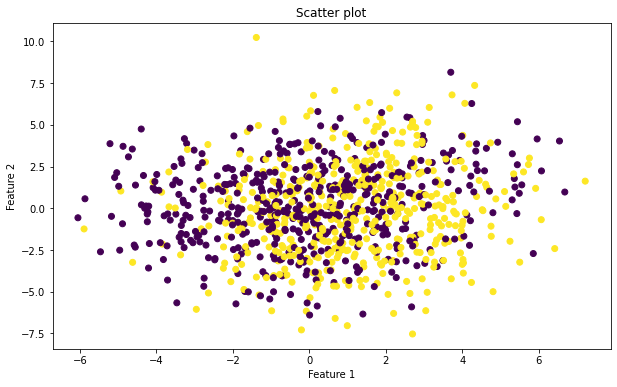

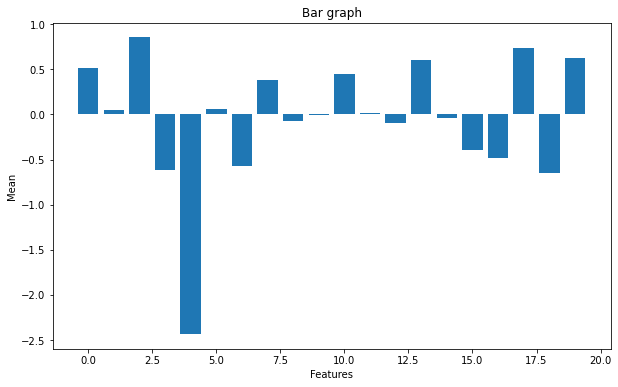

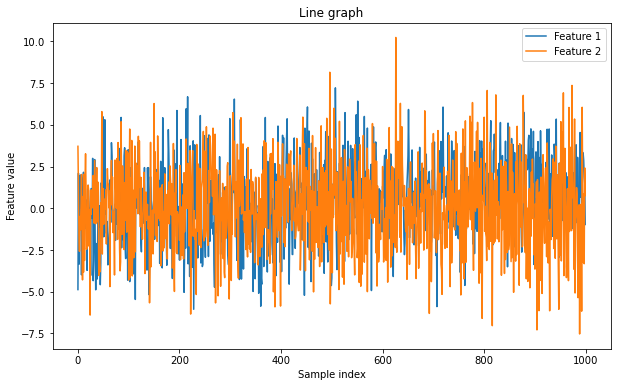

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Scatter plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

feature_means = np.mean(X, axis=0)
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_means)
plt.title('Стовпчикова діаграма')
plt.xlabel('Features')
plt.ylabel('Середнє значення')
plt.show()

sorted_indices = np.argsort(y)
sorted_X = X[sorted_indices]
plt.figure(figsize=(10, 6))
plt.plot(sorted_X[:, 0], label='Feature 1')
plt.plot(sorted_X[:, 1], label='Feature 2')
plt.title('Лінійний графік')
plt.xlabel('Sample index')
plt.ylabel('Feature value')
plt.legend()
plt.show()


Візуалізація результів:

Побудувати графіки, що відображають реальні та передбачені значення для задачі регресії або матриці плутанини для задачі класифікації.
Додати підписи, легенду та інші елементи для покращення зрозуміння графіків.

7/7 [==============================] - 0s 1ms/step


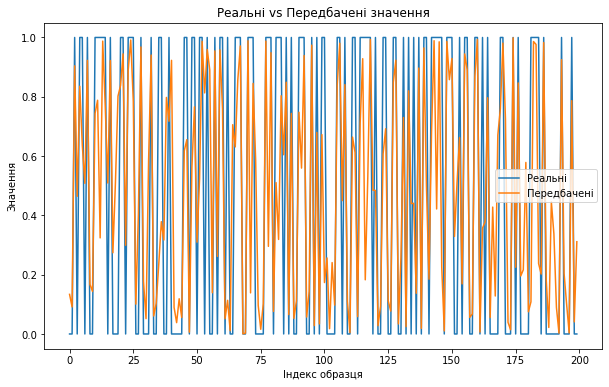

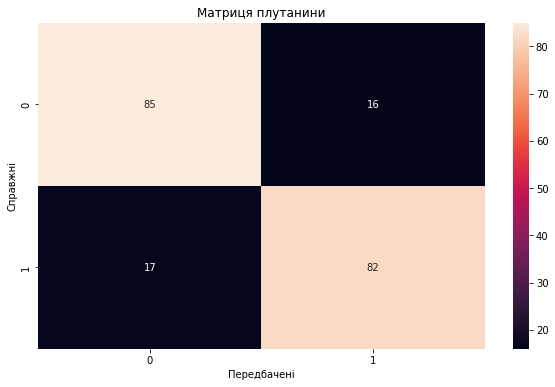

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Реальні')
plt.plot(y_pred, label='Передбачені')
plt.title('Реальні vs Передбачені значення')
plt.xlabel('Індекс образця')
plt.ylabel('Значення')
plt.legend()
plt.show()

cm = confusion_matrix(y_test, (y_pred > 0.5))
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True)
plt.title('Матриця плутанини')
plt.xlabel('Передбачені')
plt.ylabel('Справжні')
plt.show()